In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv


In [2]:
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv')
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [8]:
X = df.iloc[:, 0:7]
Y = df.iloc[:, -1]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [22]:
df.isnull().sum()
# so this is a good dataset jema koi null values nahi

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [43]:
from ydata_profiling import ProfileReport
report = ProfileReport(df)
report.to_file(output_file = 'deep.html')



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 125.20it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report.to_file(output_file = 'deep.json')


In [34]:
Y.value_counts()
# so no need to do anything in this kind of data, it is perfect i guess

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

# my initial assesment says i don't think pH value is an important column so drop it

# Nitrogen ma capping of the last 1% values 
# nitrogen ma kadach binning lagavu

# phosphorous requires serious binning (k means)

# Pottasium too requires it (k means)

# temprature is like normal so i want to keep it as it is

# uniform binning in humidity

# rainfall ma last 1.5% nu capping and then binning (k means)

# 2nd approach will be to use PCA and convert all the 4 mineral columns to 1 single column


In [55]:
X = X.drop('pH_Value', axis = 1)
X.head()

KeyError: "['pH_Value'] not found in axis"

In [56]:
from sklearn.preprocessing import KBinsDiscretizer

# Capping logic
last_1_percent_nitrogen = np.percentile(df['Nitrogen'], 99)
df['Nitrogen'] = df['Nitrogen'].apply(lambda x: last_1_percent_nitrogen if x > last_1_percent_nitrogen else x)

# Binning
cap_bin_nitrogen = KBinsDiscretizer(strategy='kmeans', n_bins=4, encode='ordinal')

In [57]:
bin_phosphorous = KBinsDiscretizer(strategy='kmeans', n_bins=4, encode='ordinal')

In [58]:
bin_pottasium = KBinsDiscretizer(strategy='kmeans', n_bins=3, encode='ordinal')

In [60]:
unf_bin_humidity = KBinsDiscretizer(strategy='uniform', n_bins=10, encode='ordinal')

In [61]:
last_1_5_percent_rainfall = np.percentile(df['Rainfall'], 98.5)
df['Rainfall'] = df['Rainfall'].apply(lambda x: last_1_5_percent_rainfall if x > last_1_5_percent_rainfall else x)

cap_bin_rainfall = KBinsDiscretizer(strategy='kmeans', n_bins=4, encode='ordinal')

In [62]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers = [
    ('tnf1', cap_bin_nitrogen, [0]),
    ('tnf2', bin_phosphorous, [1]),
    ('tnf3', bin_pottasium, [2]),
    ('tnf4', unf_bin_humidity, [4]),
    ('tnf5', cap_bin_rainfall, [5])
], remainder = 'passthrough')

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [70]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [78]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

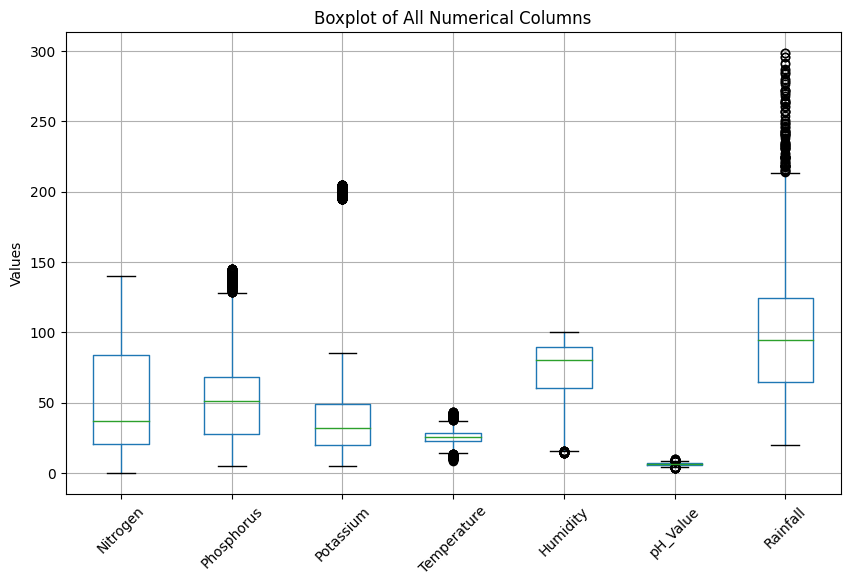

In [25]:
import matplotlib.pyplot as plt

df.boxplot(figsize=(10, 6))
plt.title("Boxplot of All Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

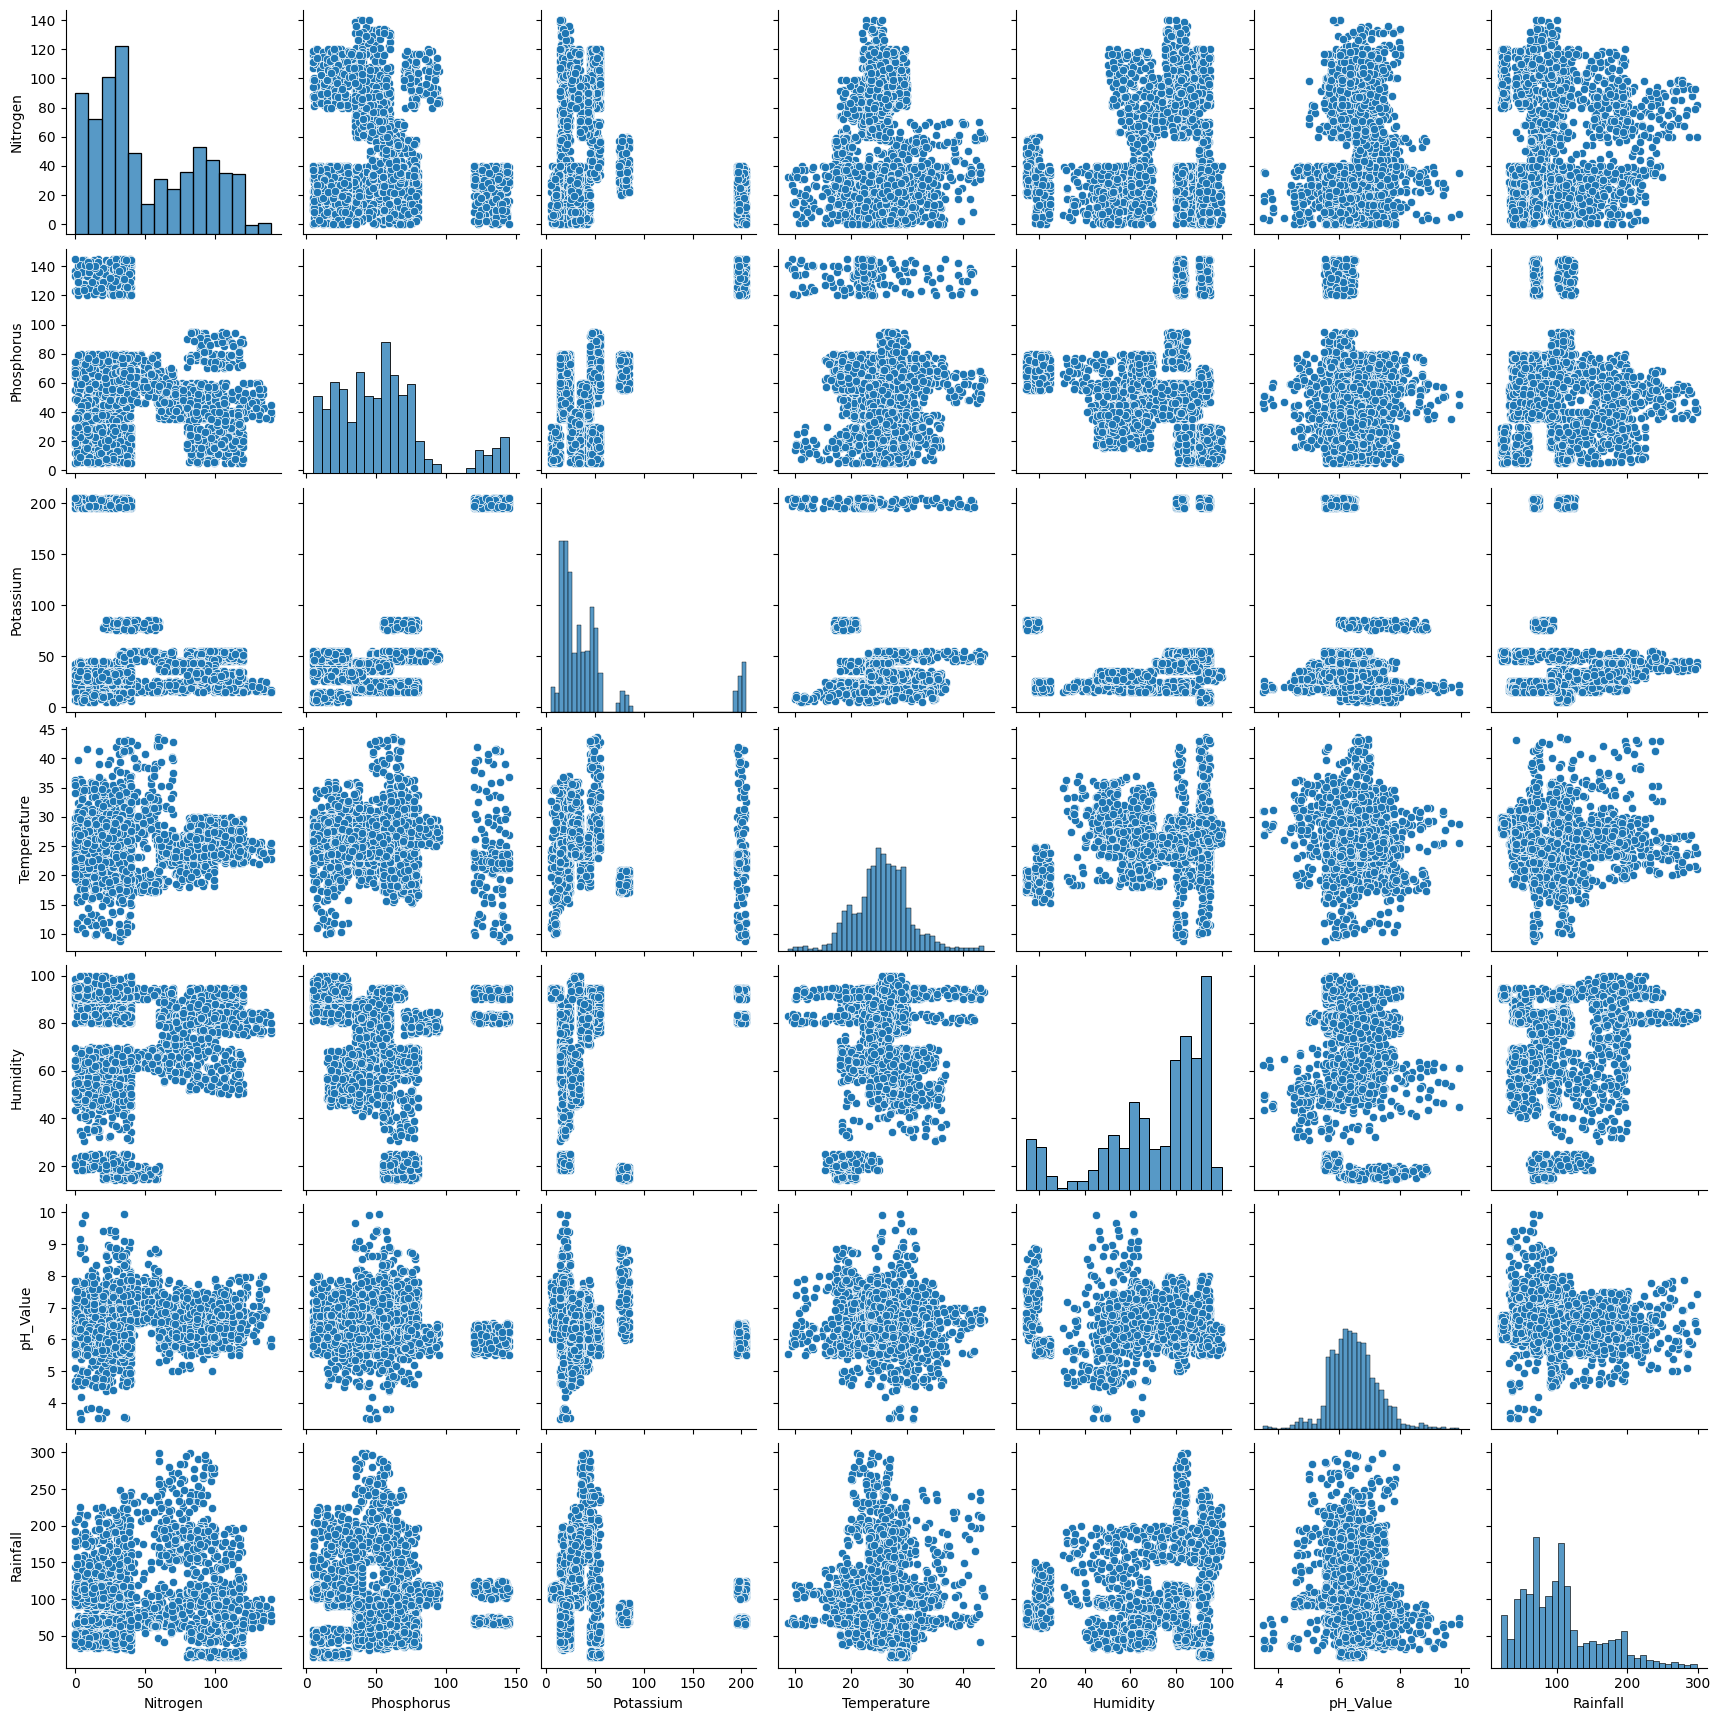

In [41]:
import seaborn as sns

sns.pairplot(df)

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [84]:
models_and_parameters = [
    {
        'name': 'RandomForest',
        'estimator': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10]
        }
    },
    {
        'name': 'VotingEnsemble_RF',
        'estimator': VotingClassifier(estimators=[
            ('rf1', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)),
            ('rf2', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)),
            ('rf3', RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42))
        ], voting='hard'),
        'params': {
            
        }
    },
    {
        'name': 'XGBoost',
        'estimator': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5]
        }
    }
]


In [85]:
best_model = None
best_score = 0
best_name = ""

for model in models_and_parameters:
    pipeline = Pipeline([
        ('classifier', model['estimator'])  
    ])
    
    grid = GridSearchCV(pipeline,
                        param_grid=model['params'],
                        cv=10,
                        scoring='accuracy',
                        n_jobs=-1)
    
    grid.fit(X_train_transformed, Y_train_encoded) 

    print(f"{model['name']} Best Score: {grid.best_score_}")
    print(f"{model['name']} Best Params: {grid.best_params_}")
    
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_name = model['name']


RandomForest Best Score: 0.9414772727272727
RandomForest Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
VotingEnsemble_RF Best Score: 0.9335227272727271
VotingEnsemble_RF Best Params: {}
XGBoost Best Score: 0.9284090909090909
XGBoost Best Params: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}


In [86]:
print(f"\nBest Model: {best_name}")
print(f"Best CV Accuracy: {best_score:.4f}")



Best Model: RandomForest
Best CV Accuracy: 0.9415


PCA method 2

In [111]:
df1 = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv')

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df1.iloc[:, 0: 7], Y, test_size = 0.2)

In [115]:
X_train.sample()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
621,31,53,16,28.74201,85.816759,6.452006,48.545986


In [116]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

pca_group1 = ['Nitrogen', 'Phosphorus', 'Potassium']
pca_group2 = ['Humidity', 'pH_Value']

passthrough_cols = [col for col in X_train.columns if col not in pca_group1 + pca_group2]

transformer = ColumnTransformer(transformers=[
    ('pca1', Pipeline([
        ('scale1', StandardScaler()),
        ('pca', PCA(n_components=1))
    ]), pca_group1),
    
    ('pca2', Pipeline([
        ('scale2', StandardScaler()),
        ('pca', PCA(n_components=1))
    ]), pca_group2)
], remainder='passthrough')  


In [118]:
pipeline = Pipeline([
    ('preprocessor', transformer),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])


In [120]:
pipeline.fit(X_train, Y_train)
accuracy = pipeline.score(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9205
